In [1]:
# Import required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
# Paths and configuration
train_dir = '/Users/chaitrabhat/Final_project/dataset/train80'
test_dir = '/Users/chaitrabhat/Final_project/dataset/test20'
categories = ['Panama Disease','cordana','healthy','pestalotiopsis','sigatoka','xamthomonas']
img_size = (250, 250)
batch_size = 32
# ImageDataGenerators with DenseNet201 preprocessing
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Flow from directory
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
# Compute class weights
class_labels = train_data.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_labels),
    y=class_labels
)
class_weights = dict(enumerate(class_weights))
# Load DenseNet201 model
base_model = DenseNet201(input_shape=(250, 250, 3), include_top=False, weights='imagenet')
base_model.trainable = True

# Optional: freeze some layers
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.6),
    Dense(len(categories), activation='softmax')
])
# Compile model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Train model
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    epochs=25,
    callbacks=[early_stopping],
    class_weight=class_weights
)



Found 4800 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


/Users/chaitrabhat/Banana_Project/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.4171 - loss: 3.6980
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.8327 - loss: 1.9820
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9085 - loss: 1.3944
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.9395 - loss: 1.1234
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.9412 - loss: 0.9983
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9623 - loss: 0.8786
Epoch 7/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9588 - loss: 0.8026
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.9616 - loss: 0.7423
Epoch 9/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9709 - loss: 0.6779
Epoch 10/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.9696 - loss: 0.6248
Epoch 11/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9783 - loss: 0.5724
Epoch 12/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 

/Users/chaitrabhat/Banana_Project/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9822 - loss: 0.1747



 Final Test Accuracy: 0.9800 | Test Loss: 0.1929
 Final Training Accuracy: 0.9925


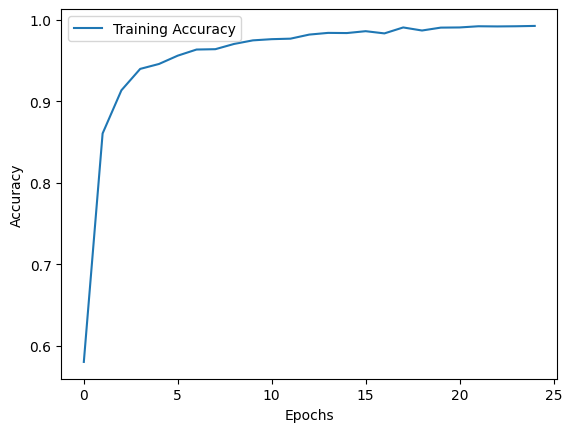

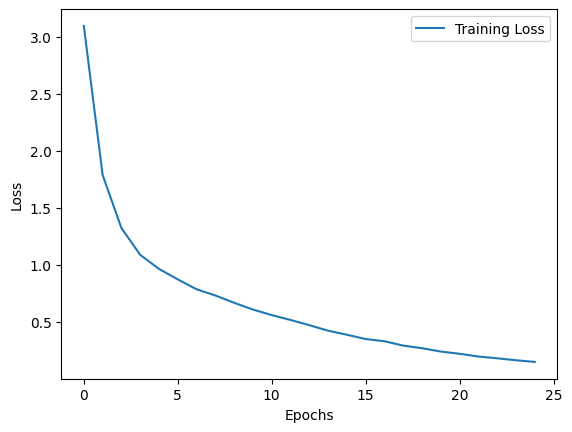


 Predicting test data for evaluation...
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step

 Classification Report:
                precision    recall  f1-score   support

Panama Disease     1.0000    0.9800    0.9899       200
       cordana     1.0000    1.0000    1.0000       200
       healthy     0.9412    0.9600    0.9505       200
pestalotiopsis     0.9901    1.0000    0.9950       200
      sigatoka     0.9852    1.0000    0.9926       200
   xamthomonas     0.9641    0.9400    0.9519       200

      accuracy                         0.9800      1200
     macro avg     0.9801    0.9800    0.9800      1200
  weighted avg     0.9801    0.9800    0.9800      1200


 Confusion Matrix:


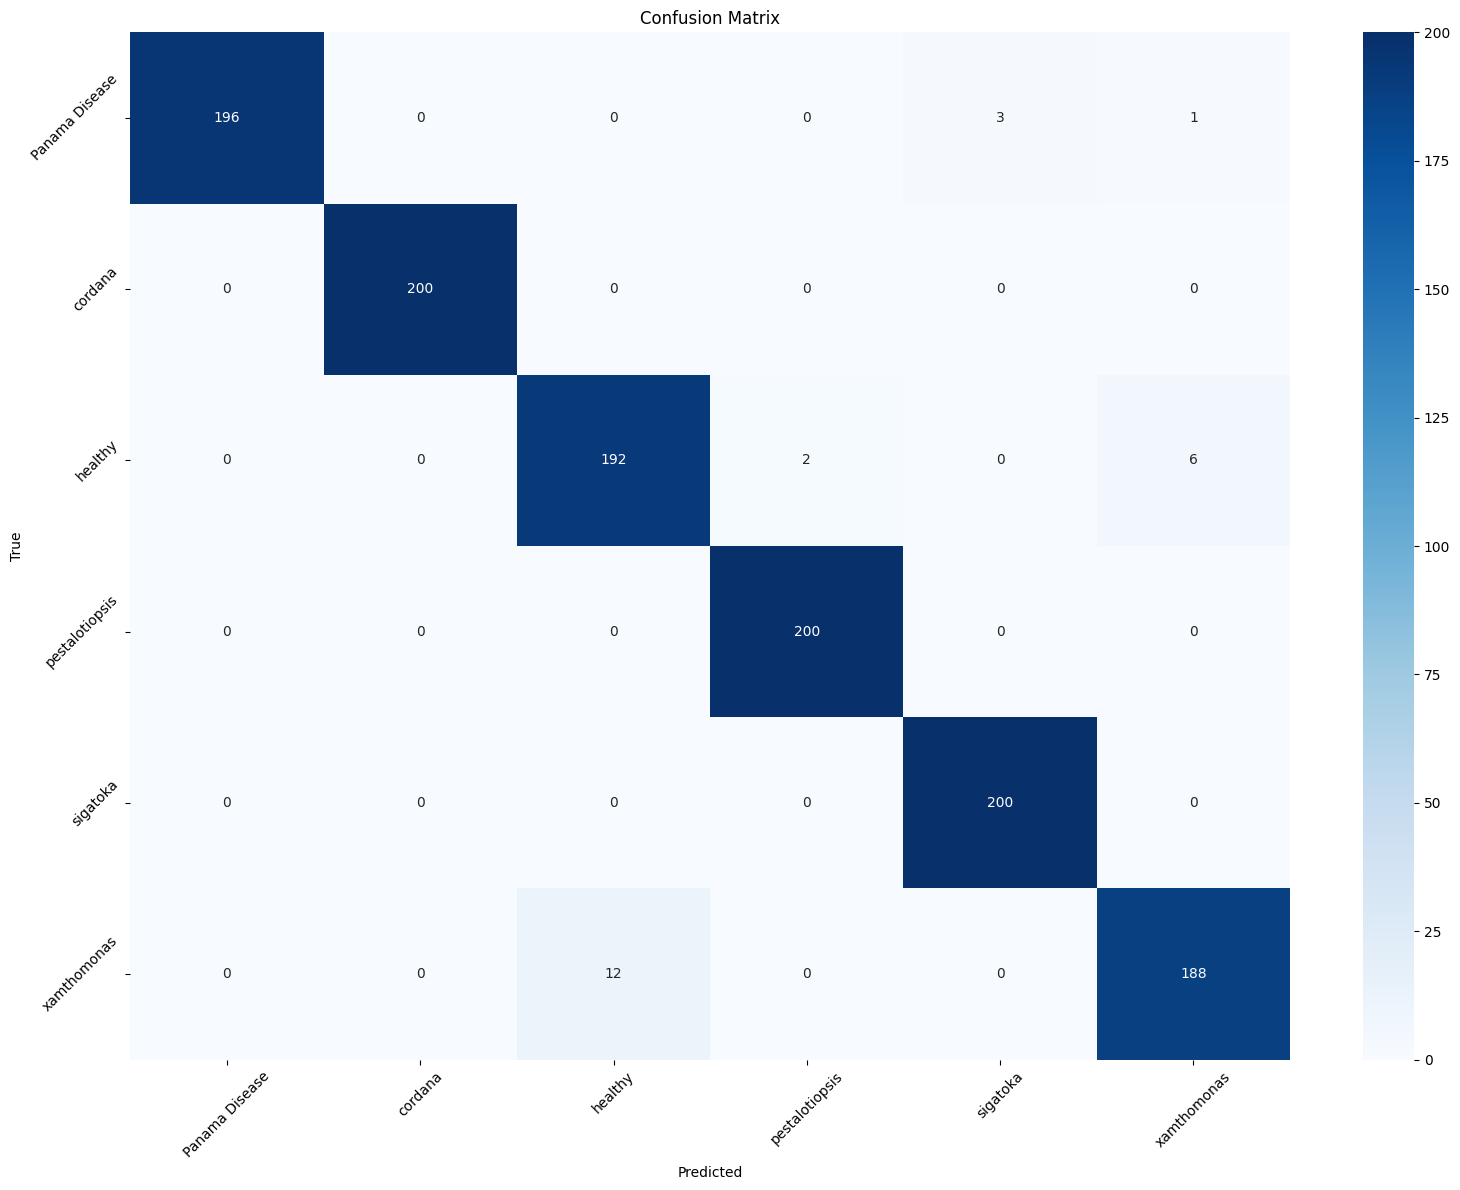

In [2]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"\n Final Test Accuracy: {test_accuracy:.4f} | Test Loss: {test_loss:.4f}")
train_accuracy = history.history['accuracy'][-1]
print(f" Final Training Accuracy: {train_accuracy:.4f}")

# Save model
model.save('/Users/chaitrabhat/Final_project/models/DenseNet201_banana_classification_model80.h5')
# Plot accuracy & loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Classification Report & Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("\n Predicting test data for evaluation...")
y_true = test_data.classes
y_probs = model.predict(test_data)
y_pred = np.argmax(y_probs, axis=1)

print("\n Classification Report:")
report = classification_report(y_true, y_pred, target_names=categories, digits=4)
print(report)

print("\n Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
# Prediction Function
def predict_image(image_path):
    from tensorflow.keras.utils import load_img, img_to_array
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    class_idx = tf.argmax(predictions[0]).numpy()
    return categories[class_idx]

# Test the prediction function
sample_image_path = '/Users/chaitrabhat/Final_project/dataset/test20/Panama Disease/0001.jpg'
print("Predicted Class:", predict_image(sample_image_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Panama Disease
